In [1]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import misc
import random
import keras

Using TensorFlow backend.


In [2]:
i = 0
train_num_images = 0
images = []
y = []
Y_dict = {}
for dirnames in os.listdir("data/train_data"):
    print(dirnames)
    Y_dict[dirnames] = i
    for filename in os.listdir("data/train_data/"+ dirnames):
        train_num_images = train_num_images + 1
        #print(filenames,"\n")
        # img = mpimg.imread("data/train_valid/"+ dirnames + "/" + filename) or  img =  misc.imread("data/train_valid/"+ dirnames + "/" + filename)
        img =  misc.imread("data/train_data/"+ dirnames + "/" + filename)
#         plt.imshow(img)
#         plt.show()
        if img is not None:
            images.append(img)
            y.append(i)
#             print(img)
#             print(y)
            
    i = i + 1
    


dog
horse
automobile
truck
frog
bird
cat
ship
deer
airplane


In [3]:
print(Y_dict)
# print(x)
# print(y)
# print(images)
# plt.imshow(x[0])
# print(y[0])
# plt.show()
# plt.imshow(images[1])
# plt.show()
# plt.imshow(images[2])
# plt.show()
# plt.imshow(images[3])
# plt.show()

{'dog': 0, 'horse': 1, 'automobile': 2, 'truck': 3, 'frog': 4, 'bird': 5, 'cat': 6, 'ship': 7, 'deer': 8, 'airplane': 9}


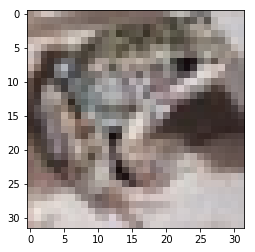

In [4]:
c = list(zip(images, y))

random.shuffle(c)

X,Y = zip(*c)

# print (X)
# print (Y)
plt.imshow(X[0])
plt.show()
# print(y.shape)


# ANOTHER METHOD OF SHUFFLING BUT SHUFFLE IN PARTICULAR PATTERN DEPENDEING ON RANDOM STATE
# from sklearn.utils import shuffle
# X,Y = shuffle(images, y, random_state=4)
# # print(y)

# # print (X)
# print (Y)
# plt.imshow(X[0])
# plt.show()
# # print(X[0])
# # print(y.shape)

In [5]:
#print(images)
# print(images[0].shape)
# print(X)
# print(Y)
train_set = np.reshape(X , (train_num_images,32,32,3) )
# print(train_set)
print(train_set.shape)
# train_out = np.reshape(Y,(train_num_images,1))
# print(train_out.shape)

(45000, 32, 32, 3)


In [6]:
train_out = keras.utils.to_categorical(Y,num_classes=10)
print(train_out.shape)

(45000, 10)


In [7]:
# images = []
# for filename in os.listdir("myfolder"):
#     img = mpimg.imread(os.path.join("myfolder", filename))
#     print(filename)
#     if img is not None:
#         images.append(img)
# print(images)

In [8]:
# i = 0
# imagess = []
# y = []
# for dirnames in os.listdir("data/train_valid"):
#     print(dirnames)
#     for filename in os.listdir("data/train_valid/"+ dirnames):
#         #print(filenames,"\n")
#         img = mpimg.imread("data/train_valid/"+ dirnames + "/" + filename)
#         if img is not None:
#             imagess.append(img)
#             y.append(i)
#     i = i + 1
    


In [9]:
# print(imagess)

In [10]:
# FOr valid_data

i = 0
valid_num_images = 0
v_images = []
v_y = []
v_Y_dict = {}
for v_dirnames in os.listdir("data/valid_data"):
#     print(v_dirnames)
    v_Y_dict[v_dirnames] = i
    for v_filename in os.listdir("data/valid_data/"+ v_dirnames):
        valid_num_images = valid_num_images + 1
        #print(filenames,"\n")
        # img = mpimg.imread("data/train_valid/"+ dirnames + "/" + filename) or  img =  misc.imread("data/train_valid/"+ dirnames + "/" + filename)
        v_img =  misc.imread("data/valid_data/"+ v_dirnames + "/" + v_filename)
#         plt.imshow(v_img)
#         plt.show()
        if img is not None:
            v_images.append(v_img)
            v_y.append(i)
#             print(v_img)
#             print(v_y)
            
    i = i + 1
    


In [11]:
print(v_Y_dict)

{'dog': 0, 'horse': 1, 'automobile': 2, 'truck': 3, 'frog': 4, 'bird': 5, 'cat': 6, 'ship': 7, 'deer': 8, 'airplane': 9}


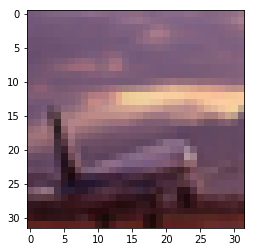

In [12]:
v_c = list(zip(v_images, v_y))

random.shuffle(v_c)

v_X,v_Y = zip(*v_c)

# print (v_X)
# print (v_Y)
plt.imshow(v_X[0])
plt.show()

In [13]:
# print(v_Y)
validation_set = np.reshape(v_X , (valid_num_images,32,32,3) )
# print(train_set)
print(validation_set.shape)


(5000, 32, 32, 3)


**Details of the training dataset:**

Images are of shape (32,32,3)
Training: train_num_images pictures
Valid: valid_num_images pictures


In [14]:
# print(v_Y)
validation_out = keras.utils.to_categorical(v_Y,num_classes=10)
print(validation_out.shape)
# validation_out = np.reshape(v_Y , (valid_num_images,1) )
# print(validation_out.shape)

(5000, 10)


In [15]:
def build_model(input_shape):  # input_shape here = (32,32,3)
    X_input = keras.layers.Input(input_shape)
    
    X = keras.layers.Conv2D(6 ,(5,5), strides = (1,1) ,padding = 'same' , name = 'conv0')(X_input)
    X = keras.layers.BatchNormalization(axis = 3 , name = 'bn0')(X)
    X = keras.layers.Activation('relu')(X)
    X = keras.layers.MaxPooling2D((2,2) , name = 'maxpool1')(X)
    
    X = keras.layers.Conv2D( 16,(5,5), strides = (1,1) , name = 'conv1')(X)
    X = keras.layers.BatchNormalization(axis = 3, name = 'bn1')(X)
    X = keras.layers.Activation('relu')(X)
    X = keras.layers.MaxPool2D((2,2) , name = 'maxpool2')(X)
    
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(120 , activation = 'relu' , name = 'fc1')(X)
    X = keras.layers.Dense(84 , activation = 'relu' , name = 'fc2')(X)
    X = keras.layers.Dense(10 , activation = 'softmax' , name = 'fc3')(X)
    
    model = keras.models.Model(inputs = X_input , outputs = X , name = 'CifarModel')
    return model

In [16]:
CIFARModel = build_model(train_set.shape[1:])

In [17]:
CIFARModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 32, 32, 6)         456       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 32, 32, 6)         24        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 6)         0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 16, 16, 6)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 12, 12, 16)        2416      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 12, 12, 16)        64        
__________

In [18]:
CIFARModel.compile(loss='categorical_crossentropy' , optimizer='adam', metrics = ["accuracy"])

In [19]:
CIFARModel.fit(x = train_set ,y = train_out, epochs = 200 , batch_size = 32)

Epoch 1/200
45000/45000 [==============================] - 16s - loss: 1.4832 - acc: 0.4637    
Epoch 2/200
45000/45000 [==============================] - 14s - loss: 1.2098 - acc: 0.5654    
Epoch 3/200
45000/45000 [==============================] - 15s - loss: 1.0905 - acc: 0.6123    
Epoch 4/200
45000/45000 [==============================] - 14s - loss: 1.0041 - acc: 0.6451    
Epoch 5/200
45000/45000 [==============================] - 14s - loss: 0.9413 - acc: 0.6653    
Epoch 6/200
45000/45000 [==============================] - 14s - loss: 0.8905 - acc: 0.6856    
Epoch 7/200
45000/45000 [==============================] - 14s - loss: 0.8473 - acc: 0.6996    
Epoch 8/200
45000/45000 [==============================] - 15s - loss: 0.8090 - acc: 0.7132    
Epoch 9/200
45000/45000 [==============================] - 14s - loss: 0.7672 - acc: 0.7298    
Epoch 10/200
45000/45000 [==============================] - 14s - loss: 0.7345 - acc: 0.7425    
Epoch 11/200
45000/45000 [=============

45000/45000 [==============================] - 16s - loss: 0.1167 - acc: 0.9592    
Epoch 86/200
45000/45000 [==============================] - 17s - loss: 0.1184 - acc: 0.9592    
Epoch 87/200
45000/45000 [==============================] - 15s - loss: 0.1172 - acc: 0.9599    
Epoch 88/200
45000/45000 [==============================] - 15s - loss: 0.1168 - acc: 0.9596    
Epoch 89/200
45000/45000 [==============================] - 16s - loss: 0.1143 - acc: 0.9606    
Epoch 90/200
45000/45000 [==============================] - 16s - loss: 0.1044 - acc: 0.9635    
Epoch 91/200
45000/45000 [==============================] - 15s - loss: 0.1126 - acc: 0.9601    
Epoch 92/200
45000/45000 [==============================] - 15s - loss: 0.1061 - acc: 0.9642    
Epoch 93/200
45000/45000 [==============================] - 17s - loss: 0.1132 - acc: 0.9611    
Epoch 94/200
45000/45000 [==============================] - 16s - loss: 0.1070 - acc: 0.9625    
Epoch 95/200
45000/45000 [=================

45000/45000 [==============================] - 14s - loss: 0.0706 - acc: 0.9763    
Epoch 169/200
45000/45000 [==============================] - 14s - loss: 0.0677 - acc: 0.9771    
Epoch 170/200
45000/45000 [==============================] - 14s - loss: 0.0597 - acc: 0.9793    
Epoch 171/200
45000/45000 [==============================] - 14s - loss: 0.0717 - acc: 0.9762    
Epoch 172/200
45000/45000 [==============================] - 14s - loss: 0.0659 - acc: 0.9779    
Epoch 173/200
45000/45000 [==============================] - 14s - loss: 0.0750 - acc: 0.9750    
Epoch 174/200
45000/45000 [==============================] - 14s - loss: 0.0627 - acc: 0.9789    
Epoch 175/200
45000/45000 [==============================] - 14s - loss: 0.0647 - acc: 0.9777    
Epoch 176/200
45000/45000 [==============================] - 14s - loss: 0.0607 - acc: 0.9799    
Epoch 177/200
45000/45000 [==============================] - 14s - loss: 0.0680 - acc: 0.9779    
Epoch 178/200
45000/45000 [=======

In [20]:
preds = CIFARModel.evaluate(x = validation_set, y = validation_out)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4704/5000 [===========================>..] - ETA: 0s
Loss = 3.5883034523
Test Accuracy = 0.6218
